In [1]:
#for algebric data 
import numpy as np
#for data processing
import pandas as pd
#for data visulisation
import matplotlib.pyplot as plt
import seaborn as sns 

In [42]:
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
column = df.columns
column

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

###### In Product_2 and Product_3 column there are lots of null values if we will remove these rows then the analysis report will not be that much good so we will first impute null values

In [8]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [9]:
from sklearn.preprocessing import Imputer

imputer=Imputer(missing_values='NaN',strategy='mean', axis=0)
products=df.iloc[:,-3:-1]
imputer=imputer.fit(products)
products=imputer.transform(products)
products=pd.DataFrame(products)
products.columns = ['Product_2','Product_3']

/home/deepanshu/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['new_age'] = df.Age.str.split('-').str.get(1)
df['new_age']=df["new_age"].fillna(55)

In [12]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(str).str[0]

In [13]:
df.drop(['Product_Category_2','Product_Category_3','Product_ID','Age'], axis=1, inplace=True)
data=pd.concat([products,df],axis=1)

In [14]:
data.head()

,Product_2,Product_3,User_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,new_age
0,9.842144,12.66984,1000001,F,10,A,2,0,3,8370,17
1,6.000000,14.00000,1000001,F,10,A,2,0,1,15200,17
2,9.842144,12.66984,1000001,F,10,A,2,0,12,1422,17
3,14.000000,12.66984,1000001,F,10,A,2,0,12,1057,17
4,9.842144,12.66984,1000002,M,16,C,4,0,8,7969,55


In [15]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(float)
data['new_age']=data['new_age'].astype(float)

In [16]:
data.head()

,Product_2,Product_3,User_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,new_age
0,9.842144,12.66984,1000001,F,10,A,2.0,0,3,8370,17.0
1,6.000000,14.00000,1000001,F,10,A,2.0,0,1,15200,17.0
2,9.842144,12.66984,1000001,F,10,A,2.0,0,12,1422,17.0
3,14.000000,12.66984,1000001,F,10,A,2.0,0,12,1057,17.0
4,9.842144,12.66984,1000002,M,16,C,4.0,0,8,7969,55.0


In [17]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [18]:
data.Gender.replace('F',1,inplace = True)
data.Gender.replace('M',0,inplace = True)

In [19]:
data.City_Category.unique()


array(['A', 'C', 'B'], dtype=object)

In [20]:
data.City_Category.replace('A',0,inplace = True)
data.City_Category.replace('B',1,inplace = True)
data.City_Category.replace('C',2,inplace = True)

In [21]:
data["Gender"] = data["Gender"].astype(float)
data["City_Category"] = data["City_Category"].astype(float)

In [22]:
data.dtypes

Product_2                     float64
Product_3                     float64
User_ID                         int64
Gender                        float64
Occupation                      int64
City_Category                 float64
Stay_In_Current_City_Years    float64
Marital_Status                  int64
Product_Category_1              int64
Purchase                        int64
new_age                       float64
dtype: object

In [23]:
data.corr()

,Product_2,Product_3,User_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,new_age
Product_2,1.000000,0.320135,0.001224,0.015238,-0.000026,-0.010068,-0.001476,0.012535,0.393505,-0.181558,0.045847
Product_3,0.320135,1.000000,0.002244,-0.015221,0.007393,-0.001478,0.001123,0.010726,0.087057,-0.012552,0.031679
User_ID,0.001224,0.002244,1.000000,0.031898,-0.023024,0.024107,-0.030655,0.018732,0.003687,0.005389,0.043893
Gender,0.015238,-0.015221,0.031898,1.000000,-0.117294,0.004129,-0.015392,0.010379,0.045661,-0.060086,0.003184
Occupation,-0.000026,0.007393,-0.023024,-0.117294,1.000000,0.033781,0.031203,0.024691,-0.008114,0.021104,0.097165
City_Category,-0.010068,-0.001478,0.024107,0.004129,0.033781,1.000000,0.019948,0.040173,-0.027444,0.068507,0.102028
Stay_In_Current_City_Years,-0.001476,0.001123,-0.030655,-0.015392,0.031203,0.019948,1.000000,-0.012663,-0.004182,0.005470,-0.002210
Marital_Status,0.012535,0.010726,0.018732,0.010379,0.024691,0.040173,-0.012663,1.000000,0.020546,0.000129,0.312155
Product_Category_1,0.393505,0.087057,0.003687,0.045661,-0.008114,-0.027444,-0.004182,0.020546,1.000000,-0.314125,0.060657
Purchase,-0.181558,-0.012552,0.005389,-0.060086,0.021104,0.068507,0.005470,0.000129,-0.314125,1.000000,0.018166


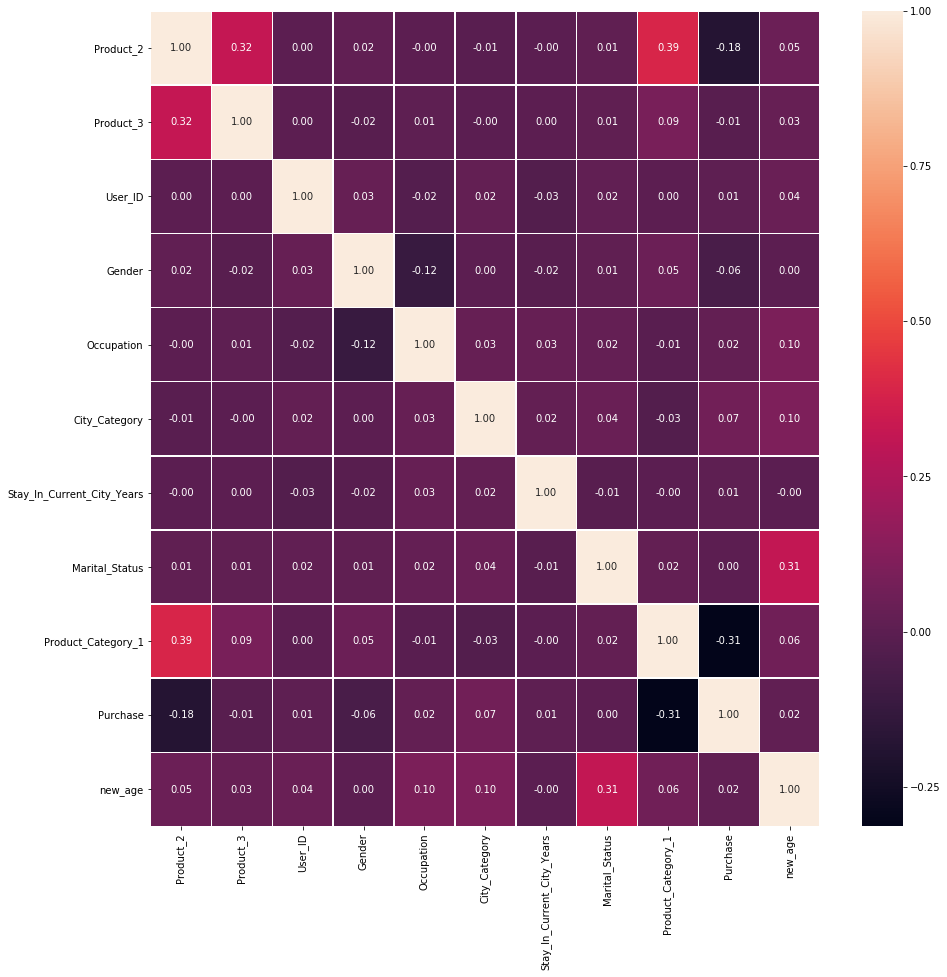

In [27]:
fig,ax = plt.subplots(figsize=(15, 15))
corr = data.corr()
sns_plot = sns.heatmap(corr,fmt= '.2f',annot=True,linewidths=0.5)
fig = sns_plot.get_figure()
fig.savefig("corr_chart.png")

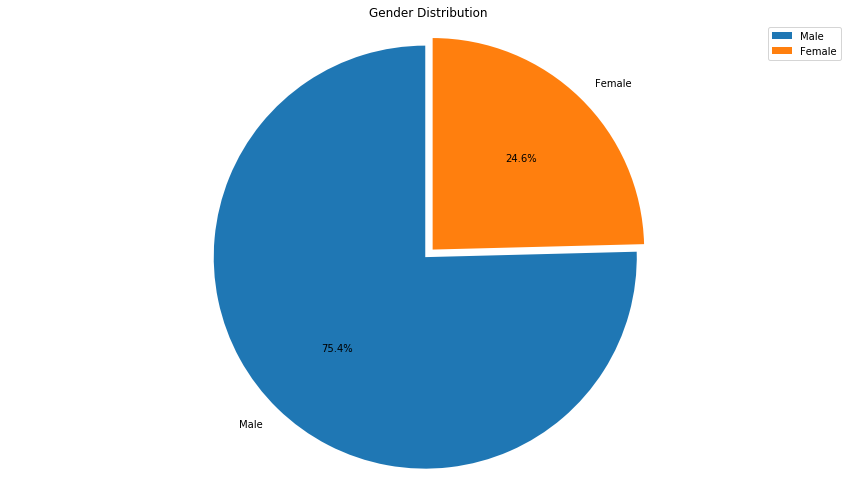

In [28]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['Gender'].value_counts(),explode = (0.05,0) ,labels=['Male','Female'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.title("Gender Distribution")
plt.savefig("Gender_pie.jpeg")
plt.tight_layout()
plt.legend()
plt.show()

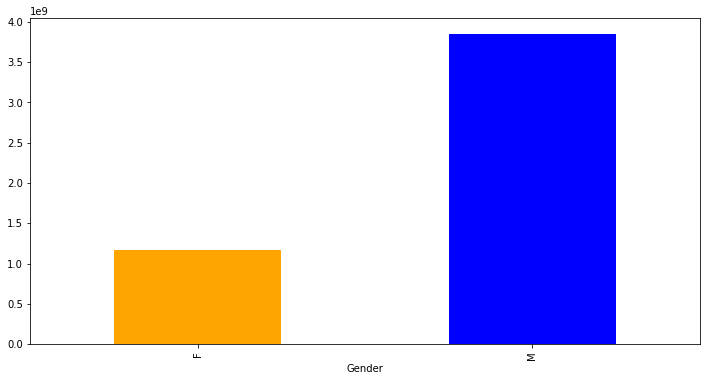

In [29]:
ax=plt.figure(figsize=(12,6))
df.groupby('Gender')['Purchase'].sum().sort_values().plot('bar',color=['orange','blue'])
plt.savefig('Gender_bar.jpeg')

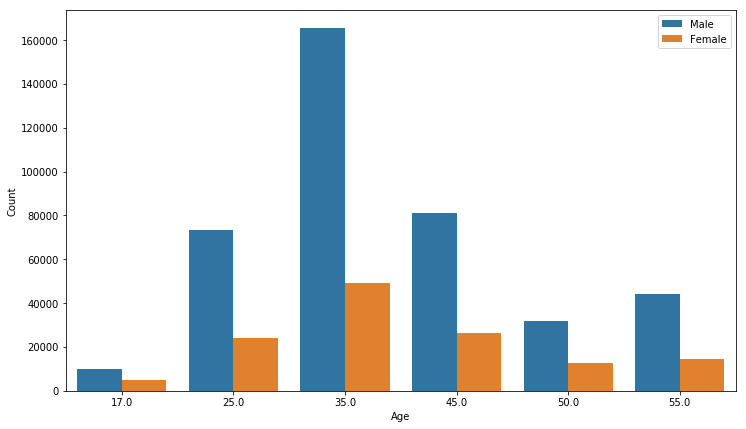

In [32]:
fig2, ax2 = plt.subplots(figsize=(12,7))
sns_plot = sns.countplot(data['new_age'],hue=data['Gender'])
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Count')
fig = sns_plot.get_figure()
fig.savefig("Age_bar.png")

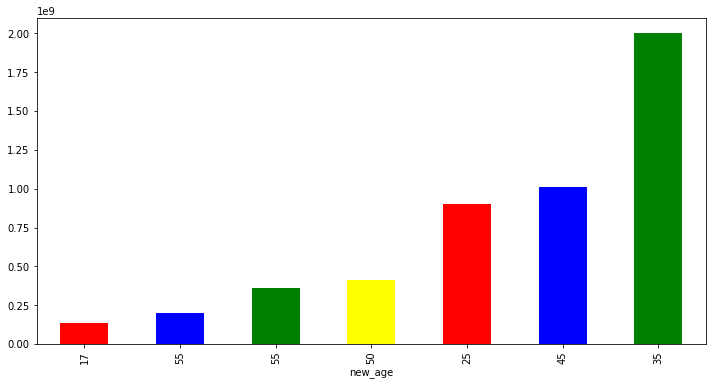

In [33]:
ax=plt.figure(figsize=(12,6))
df.groupby('new_age')['Purchase'].sum().sort_values().plot('bar',color=['red','blue','green','yellow'])
plt.savefig('Age_bar.jpeg')

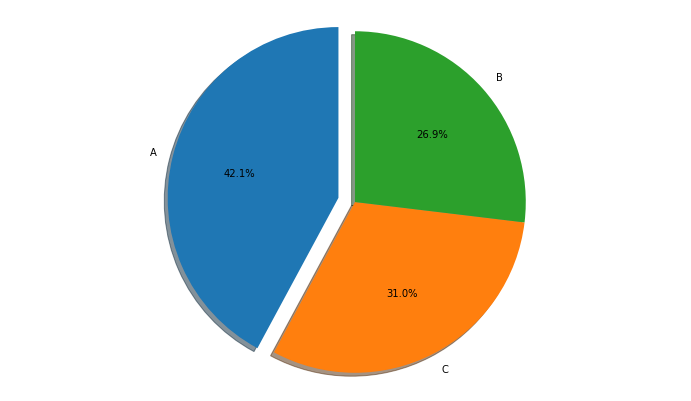

In [50]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['City_Category'].value_counts(),explode=(0.1, 0, 0), labels=df['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.savefig('City_bar.jpeg')

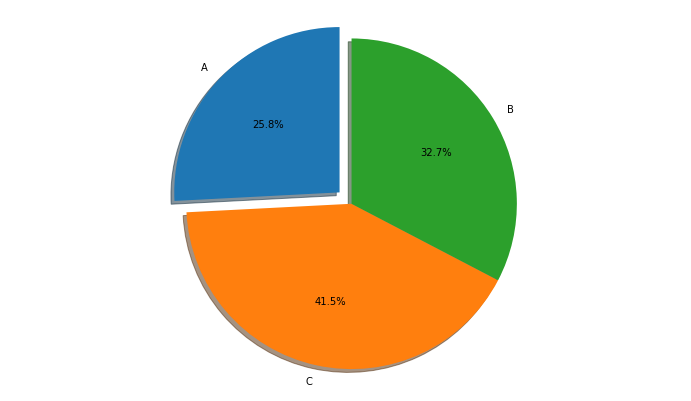

In [48]:
fig2, ax2 = plt.subplots(figsize=(12,7))
ax2.pie(df.groupby('City_Category')['Purchase'].sum(),explode=(0.1, 0, 0), labels=df['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
plt.savefig('Purchase_pie.jpeg')

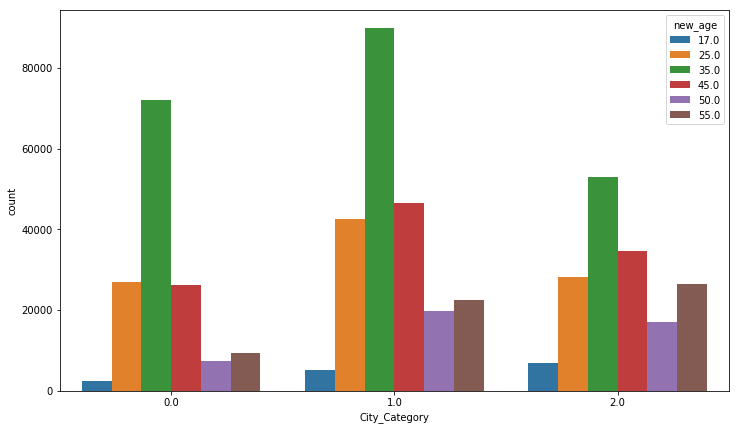

In [36]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns_plot = sns.countplot(data['City_Category'],hue=data['new_age'])
fig = sns_plot.get_figure()
fig.savefig("City_age_purchase.png")

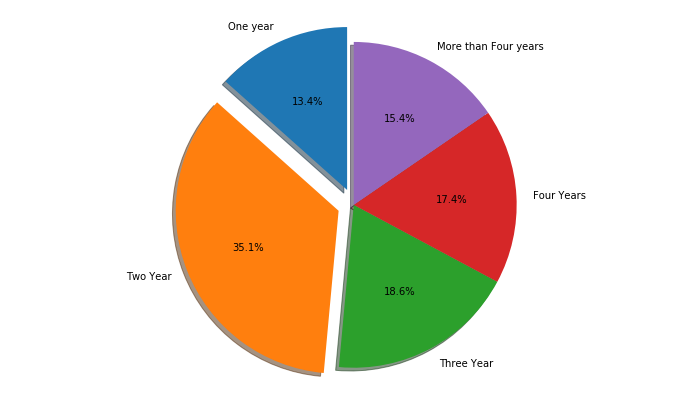

In [49]:
labels=['One year','Two Year','Three Year','Four Years','More than Four years']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.savefig('Stability.jpeg')

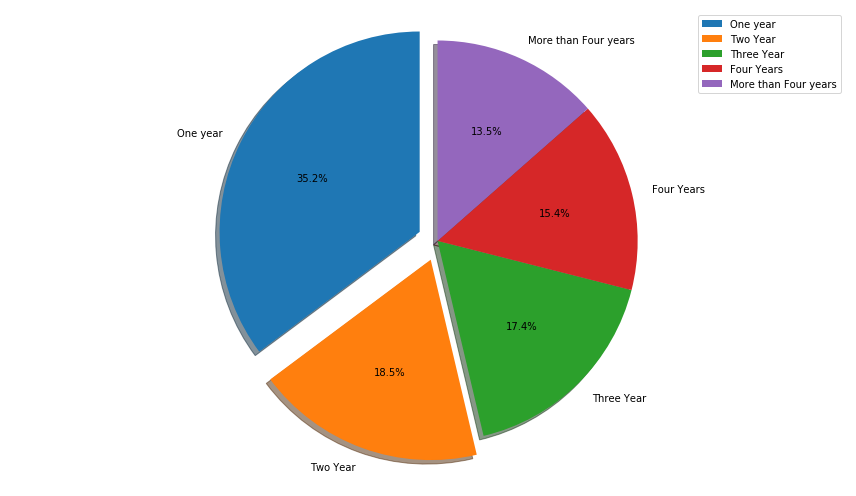

In [38]:
labels=['One year','Two Year','Three Year','Four Years','More than Four years']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Stay_In_Current_City_Years'].value_counts(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()


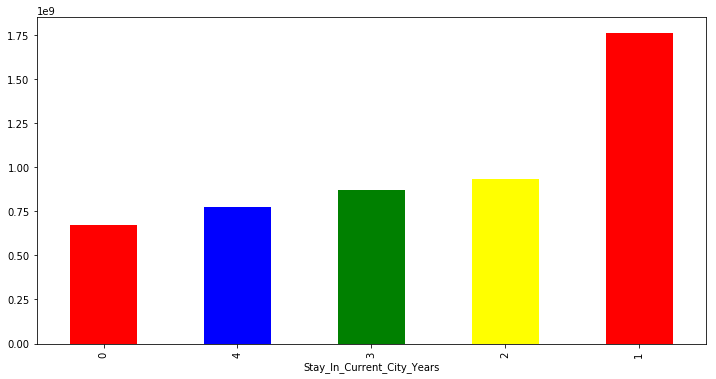

In [39]:
ax=plt.figure(figsize=(12,6))
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().sort_values().plot('bar',color=['red','blue','green','yellow'])
plt.savefig('Stability_bar.jpeg')

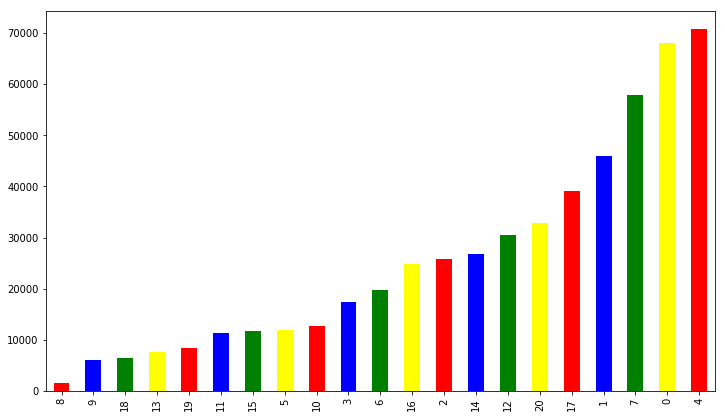

In [40]:
fig1, ax1 = plt.subplots(figsize=(12,7))
data['Occupation'].value_counts().sort_values().plot('bar',color=['red','blue','green','yellow'])
plt.savefig('Occupation.jpeg')

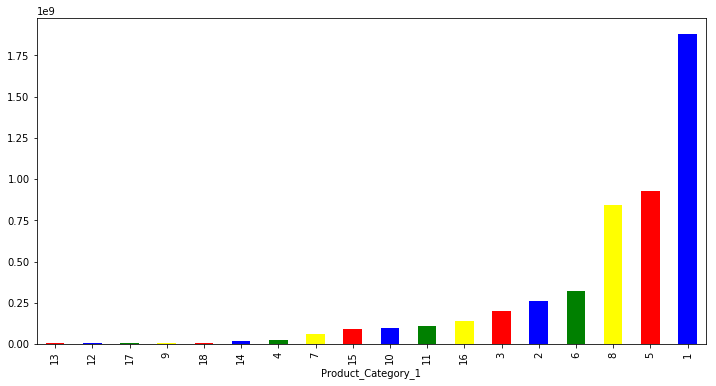

In [43]:
ax=plt.figure(figsize=(12,6))
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot('bar',color=['red','blue','green','yellow'])
plt.savefig('Product1.jpeg')

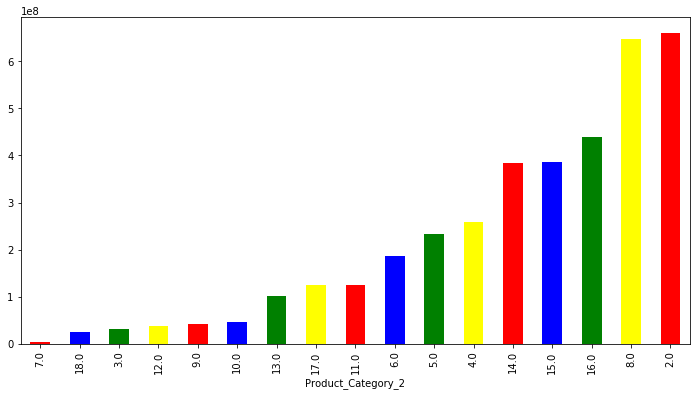

In [44]:
ax=plt.figure(figsize=(12,6))
df.groupby('Product_Category_2')['Purchase'].sum().sort_values().plot('bar',color=['red','blue','green','yellow'])
plt.savefig('Product2.jpeg')

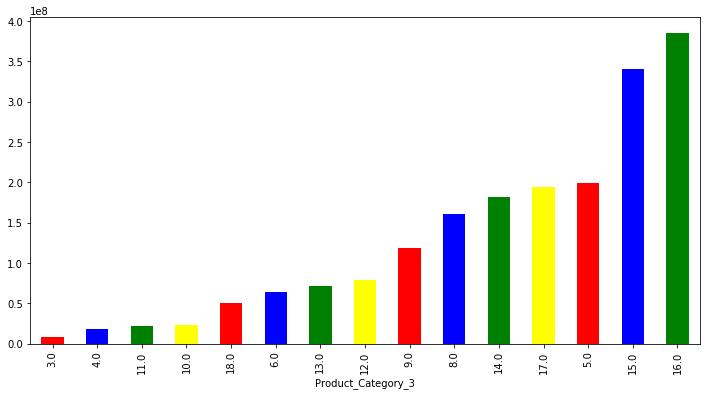

In [45]:
ax=plt.figure(figsize=(12,6))
df.groupby('Product_Category_3')['Purchase'].sum().sort_values().plot('bar',color=['red','blue','green','yellow'])
plt.savefig('Product3.jpeg')